In [185]:
from urllib.request import urlopen, Request
from bs4 import BeautifulSoup
from nltk.sentiment.vader import SentimentIntensityAnalyzer
import pandas as pd
import matplotlib.pyplot as plt

In [194]:

finviz_url = 'https://finviz.com/quote.ashx?t='
tickers = ['AMZN', 'GOOG']
news_tables = {}


In [195]:
for ticker in tickers:
    url = finviz_url + ticker
    req = Request(url=url, headers={'user-agent': 'my-app'})
    response = urlopen(req)
    html = BeautifulSoup(response, features='html.parser')
#     print(html)
    news_table = html.find(id='news-table')
    news_tables[ticker] = news_table
    
    
# print(news_tables)

In [188]:
# only for amazon ticker
# amzn_data=news_tables['AMZN']
# amzn_rows=amzn_data.findAll('tr')
# for index,row in enumerate(amzn_rows):
#     title=row.a.text
#     timestamp=row.td.text
#     print(timestamp + " " + title)

In [196]:
#for all the ticker values
parsed_data = []

In [197]:
for ticker, news_table in news_tables.items():

    for row in news_table.findAll('tr'):

        title = row.a.text
        date_data = row.td.text.split(' ')

        if len(date_data) == 1:
            time = date_data[0]
        else:
            date = date_data[0]
            time = date_data[1]

        parsed_data.append([ticker, date, time, title])




In [198]:
parsed_data

[['AMZN',
  'Jun-09-23',
  '09:42AM',
  'Bill Gates Says "You\'ll Never Go to Amazon Again" After the Next Big Artificial Intelligence (AI) Breakthrough'],
 ['AMZN',
  'Jun-09-23',
  '07:46AM',
  'What Makes Amazon.com (AMZN) the Best Investment Option?'],
 ['AMZN',
  'Jun-09-23',
  '07:00AM',
  'Can Nvidia Live Up to Its Sky-High Expectations?'],
 ['AMZN',
  'Jun-09-23',
  '06:05AM',
  "Amazon Is One Stock You'll Regret not Buying Before the Next Bull Market"],
 ['AMZN',
  'Jun-09-23',
  '06:00AM',
  'An open letter to GameStop executive chairman Ryan Cohen: Morning Brief'],
 ['AMZN',
  'Jun-09-23',
  '05:45AM',
  'Thinking About Buying Nvidia Stock? These AI Stocks Might Be Better Options.'],
 ['AMZN', 'Jun-09-23', '05:30AM', 'Amazon Stock: Buy, Sell, or Hold?'],
 ['AMZN',
  'Jun-09-23',
  '05:29AM',
  "2 Stocks I Wouldn't Touch With a 10-Foot Pole and What to Buy Instead"],
 ['AMZN',
  'Jun-09-23',
  '03:27AM',
  'S&P 500 Starts New Bull Market as Big Tech Lifts Stocks'],
 ['AMZN',


In [199]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [200]:
df = pd.DataFrame(parsed_data, columns=['ticker', 'date', 'time', 'title'])
df.head()

,ticker,date,time,title
0,AMZN,Jun-09-23,09:42AM,"Bill Gates Says ""You'll Never Go to Amazon Aga..."
1,AMZN,Jun-09-23,07:46AM,What Makes Amazon.com (AMZN) the Best Investme...
2,AMZN,Jun-09-23,07:00AM,Can Nvidia Live Up to Its Sky-High Expectations?
3,AMZN,Jun-09-23,06:05AM,Amazon Is One Stock You'll Regret not Buying B...
4,AMZN,Jun-09-23,06:00AM,An open letter to GameStop executive chairman ...


In [201]:
vader = SentimentIntensityAnalyzer()
# print(vader.polarity_scores("I dont think apple is good company"))

In [202]:
df['title'].head()

0    Bill Gates Says "You'll Never Go to Amazon Aga...
1    What Makes Amazon.com (AMZN) the Best Investme...
2     Can Nvidia Live Up to Its Sky-High Expectations?
3    Amazon Is One Stock You'll Regret not Buying B...
4    An open letter to GameStop executive chairman ...
Name: title, dtype: object

In [203]:
f = lambda title: vader.polarity_scores(title)['compound']
df['compound'] = df['title'].apply(f)
df['date'] = pd.to_datetime(df.date).dt.date

In [204]:
df.head()

,ticker,date,time,title,compound
0,AMZN,2023-06-09,09:42AM,"Bill Gates Says ""You'll Never Go to Amazon Aga...",0.3781
1,AMZN,2023-06-09,07:46AM,What Makes Amazon.com (AMZN) the Best Investme...,0.6369
2,AMZN,2023-06-09,07:00AM,Can Nvidia Live Up to Its Sky-High Expectations?,0.0000
3,AMZN,2023-06-09,06:05AM,Amazon Is One Stock You'll Regret not Buying B...,-0.2732
4,AMZN,2023-06-09,06:00AM,An open letter to GameStop executive chairman ...,0.0000


In [205]:
plt.figure(figsize=(10,8))

<Figure size 1000x800 with 0 Axes>

<Figure size 1000x800 with 0 Axes>

C:\Users\HP\AppData\Local\Temp\ipykernel_5428\3583222810.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby(['ticker', 'date']).mean().unstack()


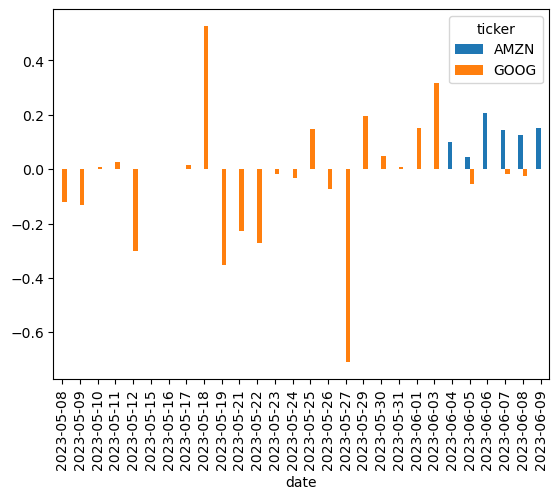

In [211]:
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='bar')
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_5428\1301264853.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  mean_df = df.groupby(['ticker', 'date']).mean().unstack()


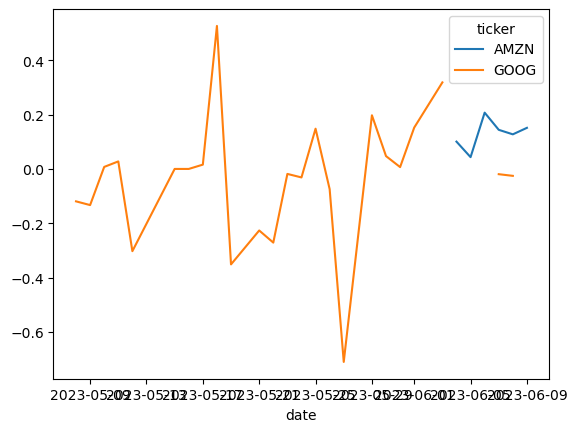

In [212]:
mean_df = df.groupby(['ticker', 'date']).mean().unstack()
mean_df = mean_df.xs('compound', axis="columns").transpose()
mean_df.plot(kind='line')
plt.show()